In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count =  len(full_data["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = full_data.loc[full_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_id

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = full_data.loc[full_data["Mouse ID"] == "g989", :]
duplicate_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = full_data[full_data["Mouse ID"].isin(duplicate_id)==False]
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_count = len(cleaned_df["Mouse ID"].unique())
new_count

248

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

sum_stats = pd.DataFrame({"mean tumor volume":mean,
                         "median tumor volume":median,
                         "tumor volume variance":var,
                         "tumor volume std. dev.":std,
                        "tumor volume std. err.":sem})
sum_stats

,mean tumor volume,median tumor volume,tumor volume variance,tumor volume std. dev.,tumor volume std. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum_aggregation = cleaned_df.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
sum_aggregation
# Using the aggregation method, produce the same summary statistics in a single line.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Mice Tested')

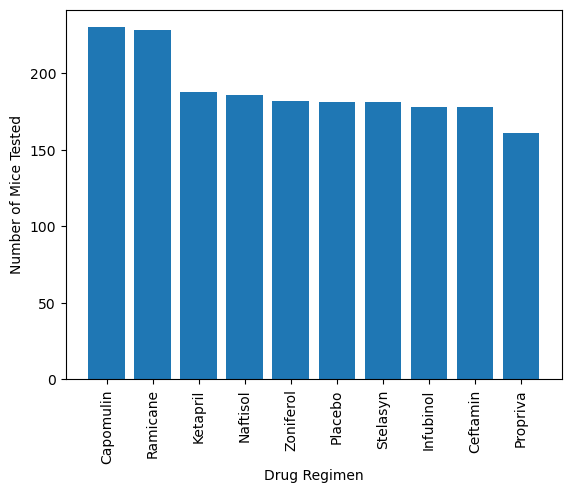

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = full_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
